# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('BlinkIT Grocery Data.csv')
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


# **Analysing Data**

In [5]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

# **Business Requirement**

In [28]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No. of Items Sold
items_sold = df['Sales'].count()

#Average Rating
avg_rating = df['Rating'].mean()

#Display all the results
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"Items Sold: {items_sold:,.0f}")
print(f"Average Rating: {avg_rating:,.1f}")


Total Sales: $1,201,681
Average Sales: $141
Items Sold: 8,523
Average Rating: 4.0


# **Chart requirement**

**Total Sales by Fat Content**

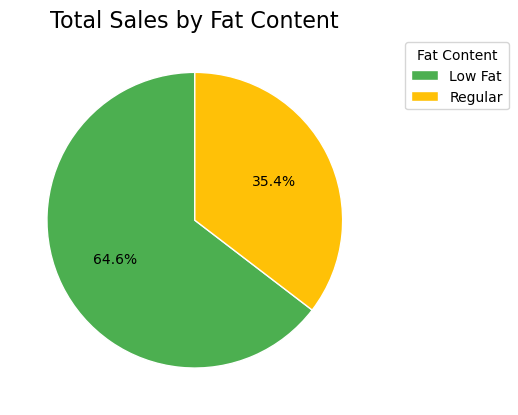

In [ ]:
total_sales = df.groupby('Item Fat Content')['Sales'].sum()

#Plotting the pie chart
custom_colors = ['#4CAF50', '#FFC107']  # green, yellow
total_sales.plot(
    kind='pie',
    autopct='%1.1f%%',         # Show percentage
    startangle=90,             # Rotate start of pie chart
    labeldistance=None,        # Remove labels from wedges
    colors=custom_colors,  
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Border between slices
)
plt.title('Total Sales by Fat Content', fontsize=16)
plt.ylabel('')  # Hide default ylabel
plt.legend(title='Fat Content', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

plt.show()


**Total Sales By Item Type**

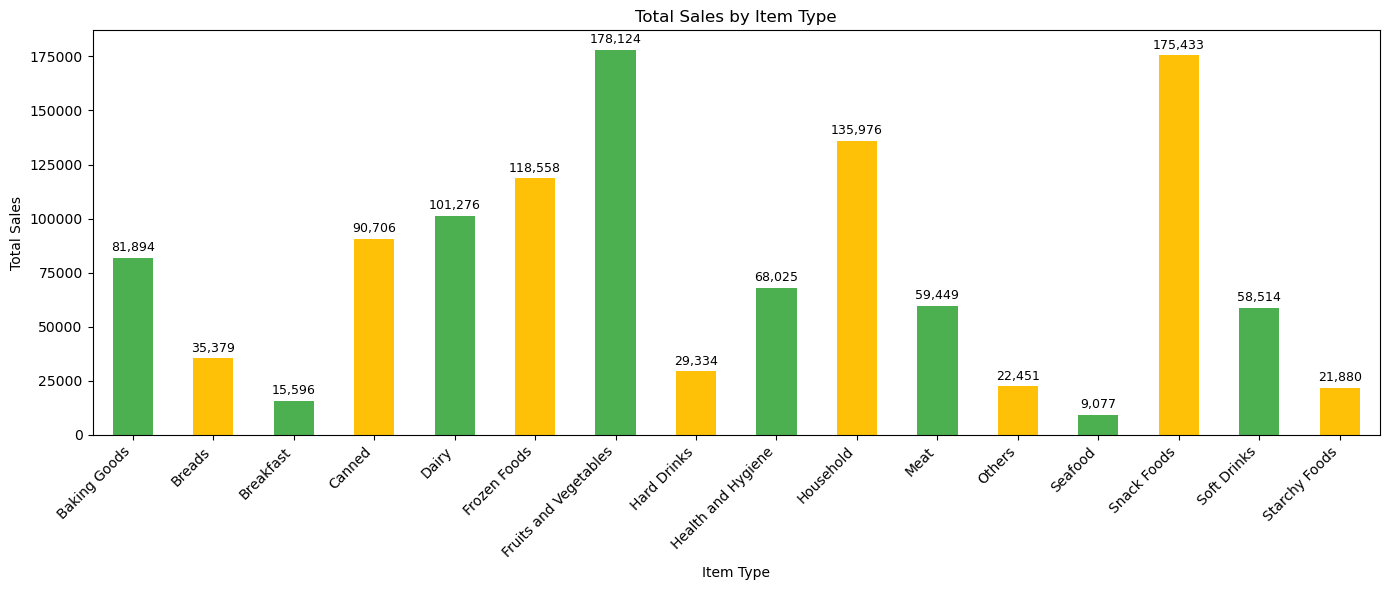

In [ ]:

#Plotting bar chart
total_sales = df.groupby('Item Type')['Sales'].sum()
custom_colors = ['#4CAF50', '#FFC107']  # green, yellow
plt.figure(figsize=(14, 6))
ax = total_sales.plot(kind='bar', color=custom_colors)

# Set labels and title
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=45, ha='right')

# Show values on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        height + total_sales.max() * 0.01,  # Y position (slightly above bar)
        f'{int(height):,}',                # Text (formatted with commas)
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()




**Fat Content by Outlet for Total Sales**

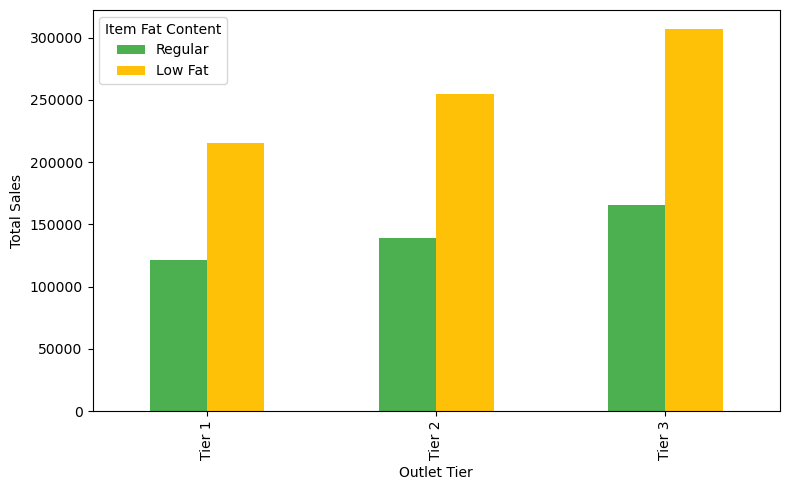

In [ ]:
group = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
group = group[['Regular','Low Fat']]
custom_colors = ['#4CAF50', '#FFC107']  # green, yellow

ax = group.plot(kind='bar',figsize=(8,5),color= custom_colors)
plt.xlabel('Outlet Tier')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

**Total Sales by Outlet Establishment**

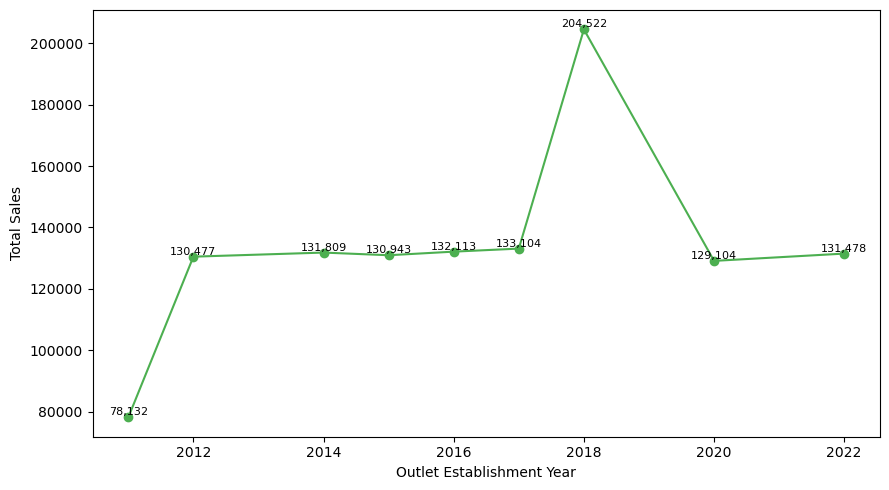

In [148]:
#Plotting Line Chart
group=df.groupby('Outlet Establishment Year')['Sales'].sum()
group.plot(kind='line',color=custom_colors,figsize=(9,5),marker='o',linestyle='-')
plt.ylabel('Total Sales')

for i, y in enumerate(group.values):
    x = group.index[i]
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Sales By Outlet Size**

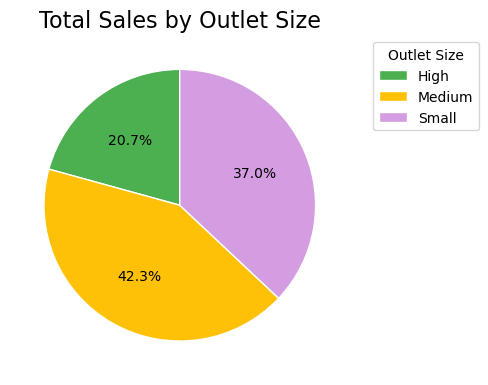

In [ ]:
#Plotting Pie Chart
custom_colors = ['#4CAF50', '#FFC107',"#D49CE1"]  # green, yellow, pink
df.groupby('Outlet Size')['Sales'].sum().plot(
    figsize=(5,5),
    kind='pie',
    autopct='%1.1f%%',         # Show percentage
    startangle=90,             # Rotate start of pie chart
    labeldistance=None,        # Remove labels from wedges
    colors=custom_colors,  
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Border between slices
)
plt.title('Total Sales by Outlet Size', fontsize=16)
plt.ylabel("")
plt.legend(title='Outlet Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Sales By Outlet Location**

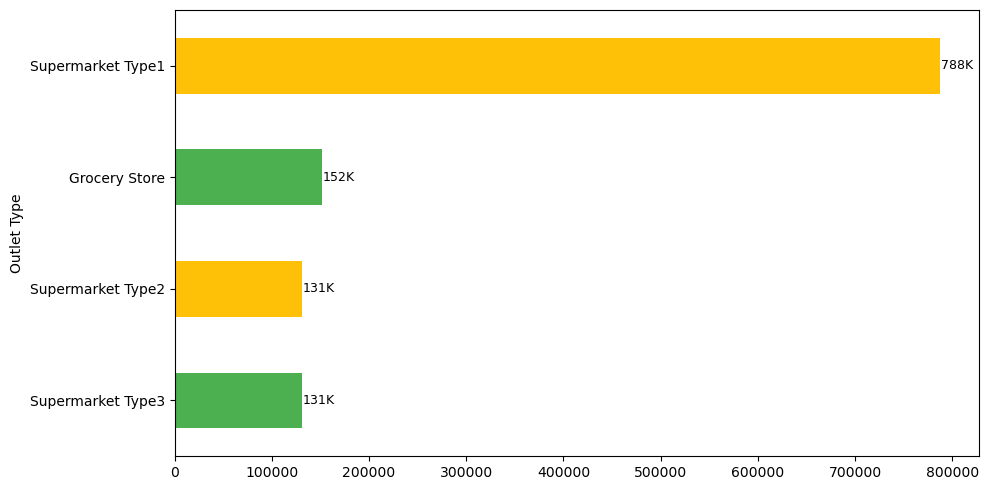

In [198]:
#Plotting horizontal bar chart
custom_colors = ['#4CAF50', '#FFC107']  # green, yellow
group = df.groupby('Outlet Type')['Sales'].sum().sort_values()
group.plot(kind='barh',figsize=(10,5),color=custom_colors)
for i, value in enumerate(group.values):
    plt.text(value + group.max() * 0.001, i, f'{value/1000:,.0f}K', va='center', fontsize=9)
plt.tight_layout()

plt.show()